<a href="https://colab.research.google.com/github/ucfilho/AI/blob/main/AI_2023/RNN/LSTM_Temporal_Series_Furniture_sales_predictions_April_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [3]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

fatal: destination path 'Machine_Learning_DataSet' already exists and is not an empty directory.
/content/Machine_Learning_DataSet


In [4]:
# df = pd.read_csv("Superstore.csv", encoding='windows-1252')
df = pd.read_excel("Superstore.xlsx")
print(df.head(3)) # shows headers with top 3 rows

   Row ID        Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16  Second Class    DV-13045   

     Customer Name    Segment        Country         City  ... Postal Code  \
0      Claire Gute   Consumer  United States    Henderson  ...       42420   
1      Claire Gute   Consumer  United States    Henderson  ...       42420   
2  Darrin Van Huff  Corporate  United States  Los Angeles  ...       90036   

   Region       Product ID         Category Sub-Category  \
0   South  FUR-BO-10001798        Furniture    Bookcases   
1   South  FUR-CH-10000454        Furniture       Chairs   
2    West  OFF-LA-10000240  Office Supplies       Labels   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.96   

In [5]:
!ls

 airline-passengers.csv         moore.csv
 AirlineSentimentTweets.csv     occupation_pictures.csv
 AMMG2212.dbc		        original.jpg
 bbc_text_cls.csv	        PG_2007_2017.csv
 boston_housing.data	        Pima_diabetes.txt
 car_count.png		        Polution_India_Kaggle.zip
 cardio_alco.csv	        README.md
 cardio_base.csv	        spam.csv
 carro2.JPG		        states_coords.csv
 carro3.jpg		        states_coords.xlsx
 carro5.jpg		        states_gmaps.csv
 cats.zip		        states_gmaps.json
 Churn_Modelling.csv	        states_line.csv
 Climate_delhi.csv	        states_line.json
 covid_data.csv		        states_merged.csv
 Customers_in_a_Shop.csv        states_merged.json
 data.json		        Superstore.csv
 datasets_894_813759_2019.csv   Superstore.xls
 diabetes.csv		        Superstore.xlsx
 ecoli.csv		        suporte_pedra.png
 ecoli.data		        tampered.jpg
 Einstein2.jpg		       'The Solvay Conference.jpg'
 Einstein.jpg		        trash_features.zip
 flights.txt		        trash.zip
 l

In [6]:
Names =df['Category'].drop_duplicates()
print(Names)

0          Furniture
2    Office Supplies
7         Technology
Name: Category, dtype: object


In [7]:
Stuff =df['Sub-Category'].drop_duplicates()
print(Stuff)

0        Bookcases
1           Chairs
2           Labels
3           Tables
4          Storage
5      Furnishings
6              Art
7           Phones
8          Binders
9       Appliances
12           Paper
26     Accessories
30       Envelopes
53       Fasteners
138       Supplies
165       Machines
335        Copiers
Name: Sub-Category, dtype: object


In [8]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')

y = furniture['Sales'].resample('MS').mean()
y = y.reset_index()

In [9]:
chairs = df.loc[df['Sub-Category'] == 'Chairs']
chairs = chairs.groupby('Order Date')['Sales'].sum().reset_index()
chairs = chairs.set_index('Order Date')
w = chairs['Sales'].resample('MS').mean()
w=w.fillna(0)

In [10]:
machines = df.loc[df['Sub-Category'] == 'Machines']
machines = machines.groupby('Order Date')['Sales'].sum().reset_index()
machines = machines.set_index('Order Date')
m = machines['Sales'].resample('MS').mean()
m=m.fillna(0) 

In [11]:
tables = df.loc[df['Sub-Category'] == 'Tables']
tables = tables.groupby('Order Date')['Sales'].sum().reset_index()
tables = tables.set_index('Order Date')
t = tables['Sales'].resample('MS').mean()
t=t.fillna(0) 

In [12]:
names = t.index; print(names)

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq='MS')


In [13]:
import datetime
months = []
for i in names:
  months.append(i.month)
#months =pd.Series(months).reset_index()

In [14]:
len(y)

48

In [15]:
y1 = y.shift(1).values[:,1]
y2 = y.shift(2).values[:,1]
y3 = y.shift(3).values[:,1]
y4 = y.shift(4).values[:,1]
y = y.values[:,1]

In [16]:
dataframe = pd.DataFrame({'mo':months,'t-1':y1,'t-2':y2,'t-3':y3,'y':y})
dataframe = dataframe.dropna()

In [17]:
#pd.set_option("max_columns", None)
#pd.set_option("max_rows", None)
dataframe.head(3)

,mo,t-1,t-2,t-3,y
3,4,857.291529,367.9316,480.194231,567.488357
4,5,567.488357,857.291529,367.9316,432.049188
5,6,432.049188,567.488357,857.291529,695.059242


In [18]:
X=dataframe.iloc[:,:-1]
y=np.array(dataframe.iloc[:,-1]).reshape(-1, 1)

In [19]:
rows, cols = X.shape
ntrain = int(rows*0.8)
X_train=X.iloc[0:ntrain,:].copy()
y_train= y[0:ntrain,:].copy()
X_test=X.drop(X_train.index)
y_test=np.delete(y,range(ntrain))
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [20]:
#, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
#X_train
scalerX = MinMaxScaler() 
scalerY = MinMaxScaler() 
scalerX.fit(X_train) 
scalerY.fit(y_train) 
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)
y_train= scalerY.transform(y_train) 
y_test= scalerY.transform(y_test)

In [21]:

for i in range(1):
  '''
  model = Sequential()
  model.add(LSTM(units=32, activation='tanh',input_shape=(X_train.shape[1], 4)))
  # units=32 
  model.add(Dense(1))
  '''
  # model = keras.Sequential()
  model = Sequential()
  # Add an Embedding layer expecting input vocab of size 1000, and
  # output embedding dimension of size 64.
  #model.add(layers.Embedding(input_dim=1000, output_dim=64))

  # Add a LSTM layer with 128 internal units.
  model.add(LSTM(128))

  # Add a Dense layer with 10 units.
  model.add(Dense(1))

  #model.summary()
  model.compile(loss='mean_squared_error', optimizer='adam')
  X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
  X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
  # reshape input to be [samples, time steps, features]
  # reshape input to be [samples, time steps, features]
  #trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  #testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=0)
  y_calc_train=model.predict(X_train)
  y_calc_test=model.predict(X_test)
  mse_test=mean_squared_error(y_test,y_calc_test)
  R2_test=r2_score(y_test,y_calc_test)
  mse_train=mean_squared_error(y_train,y_calc_train)
  R2_train=r2_score(y_train,y_calc_train)

1/1 [==============================] - 0s 35ms/step


In [22]:
X_test.shape

(9, 1, 4)

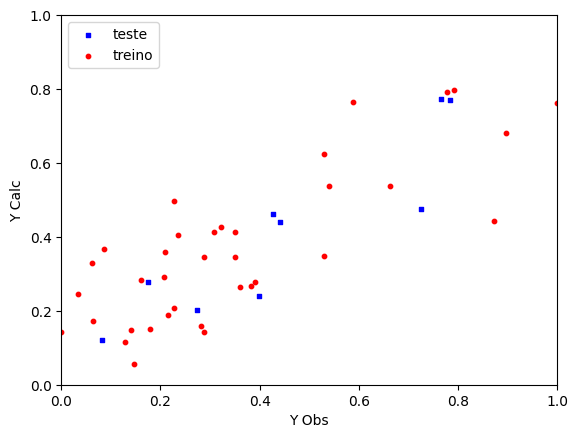

In [23]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_train,y_calc_train, s=10, c='r', marker="o", label='treino')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
plt.legend(loc='upper left')
plt.ylabel('Y Calc')
plt.xlabel('Y Obs')
plt.show()

In [24]:
mse=mean_squared_error(y_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 0.01176116002994979
R^2 teste= 0.8009417528424312


In [25]:
mse=mean_squared_error(y_train,y_calc_train)
print("MSE train=",mse)
R2=r2_score(y_train,y_calc_train)
print("R^2 train=",R2)

MSE train= 0.023908602672812064
R^2 train= 0.6417825247863028


In [26]:
y_calc = y_calc_train.tolist()

In [27]:
for yi in y_calc_test:
  y_calc.append(yi)

In [28]:
y_calc = np.array(y_calc).reshape(1,-1)
y_calc = scalerY.inverse_transform(y_calc)

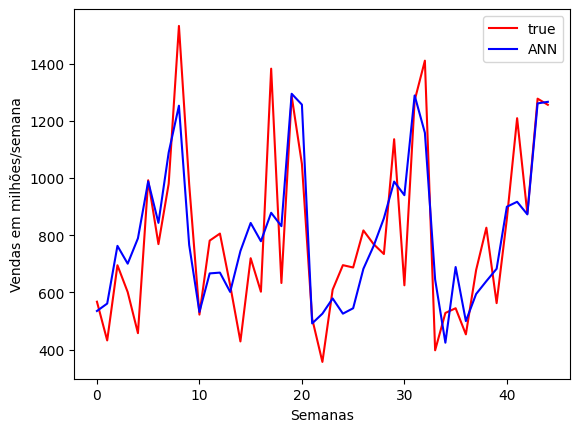

In [29]:
line1, =plt.plot(range(len(y)),y,c='r')
line2, =plt.plot(range(len(y)),y_calc[0], c='b')
plt.legend([line1,line2],['true','ANN'],loc='upper right')
plt.xlabel('Semanas')
plt.ylabel('Vendas em milhões/semana')
plt.show()

In [30]:
df['Product ID'].shape

(9994,)

In [31]:
y_calc

array([[ 535.06508387,  561.00832043,  762.88788207,  700.53046366,
         789.37374177,  988.51713757,  843.31461625, 1089.53114812,
        1253.19876033,  766.02745966,  531.65161995,  666.51587418,
         669.3121174 ,  601.76544916,  744.76938339,  843.0203947 ,
         779.04109708,  878.63707115,  831.81097049, 1294.96834188,
        1257.03208284,  491.63806709,  525.66447938,  578.91921057,
         525.71147286,  544.63940483,  682.6736782 ,  762.64189758,
         859.40407568,  987.79340651,  940.15757479, 1289.10534957,
        1158.41843533,  645.16752419,  424.16286116,  688.78044808,
         499.6167905 ,  594.50214583,  639.51454   ,  682.72566353,
         899.7676012 ,  917.03527799,  873.01249673, 1261.30615968,
        1266.72447426]])

In [32]:
y

array([[567.4883571428571],
       [432.0491875],
       [695.0592421052631],
       [601.1695],
       [457.52165625],
       [992.3533666666667],
       [769.0154375],
       [980.2214863636364],
       [1532.2983250000002],
       [978.3284666666667],
       [522.3956666666667],
       [781.2364375],
       [805.8229615384615],
       [624.9966999999999],
       [428.5655],
       [719.7063157894737],
       [602.4120125],
       [1382.7906842105265],
       [632.9801842105263],
       [1286.7013541666668],
       [1049.3554181818183],
       [508.1828666666667],
       [356.8682727272727],
       [609.5758095238094],
       [695.3731578947369],
       [687.2652272727273],
       [816.91075],
       [768.7364117647058],
       [734.3077823529411],
       [1135.9533708333333],
       [624.8724736842106],
       [1271.345152],
       [1410.7198076923078],
       [397.60213333333337],
       [528.1798],
       [544.67224],
       [453.297905],
       [678.302328],
       [826.460291304

Text(0, 0.5, 'Vendas em milhões')

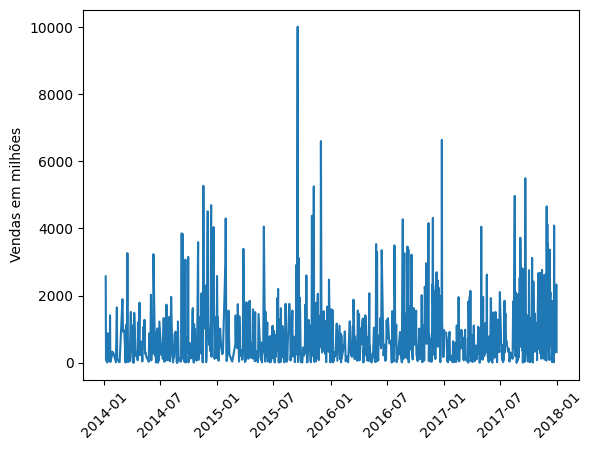

In [33]:
plt.plot(furniture)
plt.xticks(rotation=45)
plt.ylabel('Vendas em milhões')

In [34]:
sum(df['Profit'].values)

286397.02170000126